In [1]:
import imp
try:
    imp.find_module("ecell")
except ImportError:
    import sys
    sys.path.append("/opt/local/lib/python2.7/site-packages")
    sys.path.append("/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages")

In [2]:
import biosim_course

In [3]:
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
loadModel("Koivumaki-2011_pp.em")

print 't = {}'.format( getCurrentTime() )

t = 0.0


In [6]:
SystemPath_list = ( '/Cell/Membrane', '/Cell/Cytosol', '/Cell/Cytosol/ss', )

for an_E_type in ( 'Variable', 'Process' ):
    for a_SystemPath in SystemPath_list:
        for E in getEntityList( an_E_type, a_SystemPath ):
            print( ':'.join( ( an_E_type, a_SystemPath, E )))
        print("")

Variable:/Cell/Membrane:ECa
Variable:/Cell/Membrane:EK
Variable:/Cell/Membrane:ENa
Variable:/Cell/Membrane:ICaL
Variable:/Cell/Membrane:ICaLd
Variable:/Cell/Membrane:ICaLdinf
Variable:/Cell/Membrane:ICaLdtau
Variable:/Cell/Membrane:ICaLf1
Variable:/Cell/Membrane:ICaLf1tau
Variable:/Cell/Membrane:ICaLf2
Variable:/Cell/Membrane:ICaLf2tau
Variable:/Cell/Membrane:ICaLfca
Variable:/Cell/Membrane:ICaLfcainf
Variable:/Cell/Membrane:ICaLfcatau
Variable:/Cell/Membrane:ICaLfinf
Variable:/Cell/Membrane:ICaP
Variable:/Cell/Membrane:ICab
Variable:/Cell/Membrane:IK1
Variable:/Cell/Membrane:IKr
Variable:/Cell/Membrane:IKrpa
Variable:/Cell/Membrane:IKrpainf
Variable:/Cell/Membrane:IKrpatau
Variable:/Cell/Membrane:IKrpi
Variable:/Cell/Membrane:IKs
Variable:/Cell/Membrane:IKsn
Variable:/Cell/Membrane:IKsninf
Variable:/Cell/Membrane:IKsntau
Variable:/Cell/Membrane:INa
Variable:/Cell/Membrane:INaCa
Variable:/Cell/Membrane:INaK
Variable:/Cell/Membrane:INab
Variable:/Cell/Membrane:INah1
Variable:/Cell/Membr

In [7]:
Stub_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type in ('Variable', 'Process'):
        for E in getEntityList( E_type, a_SystemPath ):
                FullID = ':'.join( ( E_type, a_SystemPath, E ) )
                Stub_dict[ FullID ] = createEntityStub( FullID )

def get_FullPN_value( a_FullPN ):
    a_FullPN_list = a_FullPN.split(':')
    a_FullID = ':'.join(a_FullPN_list[:3])
    return Stub_dict[ a_FullID ][ a_FullPN_list[3] ]



In [8]:
Target_Properties = dict(
    Variable = ['Value', 'MolarConc', 'Velocity'], 
    Process  = ['Activity'],)
Logger_dict = {}

for a_SystemPath in SystemPath_list:
    for E_type, Properties in Target_Properties.items():
        for E in getEntityList( E_type, a_SystemPath ):
            for p in Properties:
                FullPN = ':'.join( ( E_type, a_SystemPath, E, p ) )
                Logger_dict[ FullPN ] = createLoggerStub( FullPN )
                Logger_dict[ FullPN ].create()



In [9]:
t0 = dict( t = getCurrentTime() )

for a_FullID, a_Stub in Stub_dict.items():
    if a_FullID.split(':')[0] == 'Variable':
        t0[ a_FullID + ':Value' ] = a_Stub['Value']
        t0[ a_FullID + ':MolarConc' ] = a_Stub['MolarConc']        

In [10]:
# step_width = 1.0e-2  # sec
step_width = 3.0  # sec

run( step_width )
print 't = {}'.format( getCurrentTime() )

t = 3.0


In [11]:
Data_dict = {}
for FullPN, Logger in Logger_dict.items():
    #Data_dict[ FullPN ] = np.array( Logger.getData( 0, 0.0005 ) )[ :, :2 ]
    Data_dict[ FullPN ] = np.array( Logger.getData( 0, getCurrentTime(), getCurrentTime()/1000.0 ) )[ :, :2 ]

In [12]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Membrane:ECa:Value',
    'Variable:/Cell/Membrane:ICaL:Value',
    'Variable:/Cell/Membrane:ICab:Value',
    'Variable:/Cell/Membrane:IK1:Value',
    'Variable:/Cell/Membrane:IKr:Value',
    'Variable:/Cell/Membrane:IKs:Value',
    'Variable:/Cell/Membrane:INa:Value',
    'Variable:/Cell/Membrane:INaCa:Value',
    'Variable:/Cell/Membrane:INaK:Value',
    'Variable:/Cell/Membrane:INab:Value',
    'Variable:/Cell/Membrane:If:Value',
    'Variable:/Cell/Membrane:Isus:Value',
    'Variable:/Cell/Membrane:It:Value',
    'Variable:/Cell/Membrane:Its:Value',
]

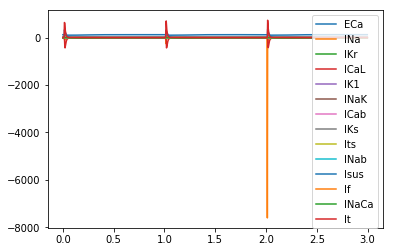

In [13]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [14]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:ECa:Value
[[0.00000000e+00 1.22874290e+02]
 [3.00000000e-03 1.23158022e+02]
 [6.01000000e-03 1.23223028e+02]
 ...
 [2.99100000e+00 1.24886224e+02]
 [2.99400000e+00 1.24886339e+02]
 [2.99700000e+00 1.24886449e+02]]
Variable:/Cell/Membrane:ICaL:Value
[[ 0.         -0.03663114]
 [ 0.003      -0.03645348]
 [ 0.00601    -0.03554672]
 ...
 [ 2.991      -0.02737506]
 [ 2.994      -0.02739   ]
 [ 2.997      -0.02740492]]
Variable:/Cell/Membrane:ICab:Value
[[ 0.00000000e+00 -1.88680402e+01]
 [ 3.00000000e-03 -1.56322330e+01]
 [ 6.01000000e-03 -1.56516615e+01]
 ...
 [ 2.99100000e+00 -1.58955704e+01]
 [ 2.99400000e+00 -1.58953194e+01]
 [ 2.99700000e+00 -1.58950684e+01]]
Variable:/Cell/Membrane:IK1:Value
[[0.00000000e+00 2.23587988e+01]
 [3.00000000e-03 2.20565944e+01]
 [6.01000000e-03 2.17775962e+01]
 ...
 [2.99100000e+00 1.93791218e+01]
 [2.99400000e+00 1.93850592e+01]
 [2.99700000e+00 1.93909865e+01]]
Variable:/Cell/Membrane:IKr:Value
[[0.00000000e+00 1.39953555e-04]
 [3

In [15]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Membrane:V:Value',
]

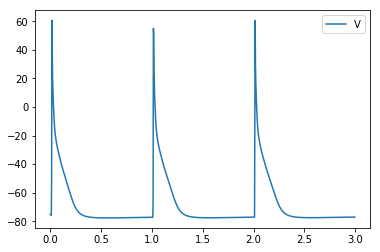

In [16]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [17]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:V:Value
[[ 0.00000000e+00 -7.53194100e+01]
 [ 3.00000000e-03 -7.55206048e+01]
 [ 6.01000000e-03 -7.57025256e+01]
 ...
 [ 2.99100000e+00 -7.71393018e+01]
 [ 2.99400000e+00 -7.71359974e+01]
 [ 2.99700000e+00 -7.71326976e+01]]


In [18]:
FullPNs_for_plot = [ 
    'Variable:/Cell/Cytosol/ss:Ca:MolarConc',
]

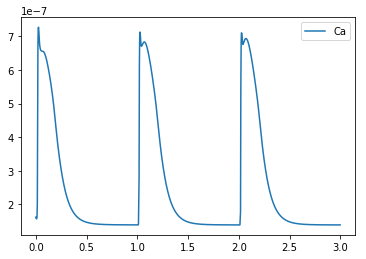

In [19]:
plt.figure()
for FullPN, d in Data_dict.items():
    if FullPN in FullPNs_for_plot:
        plt.plot( d[ :, 0 ], d[ :, 1 ], label = FullPN.split(':')[ 2 ] )

plt.legend( loc = 'upper right' )

In [20]:
for aFullPN in FullPNs_for_plot:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Cytosol/ss:Ca:MolarConc
[[0.00000000e+00 1.62000000e-07]
 [3.00000000e-03 1.58552413e-07]
 [6.01000000e-03 1.57772924e-07]
 ...
 [2.99100000e+00 1.39081731e-07]
 [2.99400000e+00 1.39080523e-07]
 [2.99700000e+00 1.39079364e-07]]


In [21]:
FullPNs_INa = [ 
    'Variable:/Cell/Membrane:INa:Value',
    'Variable:/Cell/Membrane:INam:Value',
    'Variable:/Cell/Membrane:INah1:Value',
    'Variable:/Cell/Membrane:INah2:Value',
    'Variable:/Cell/Membrane:INamtau:Value',
    'Variable:/Cell/Membrane:INah1tau:Value',
    'Variable:/Cell/Membrane:INah2tau:Value',
    'Variable:/Cell/Membrane:INaminf:Value',
    'Variable:/Cell/Membrane:INahinf:Value',
]

In [22]:
for aFullPN in FullPNs_INa:
    print( aFullPN )
    print( Data_dict[ aFullPN ])

Variable:/Cell/Membrane:INa:Value
[[ 0.00000000e+00 -1.32182962e-03]
 [ 3.00000000e-03 -1.27733452e-03]
 [ 6.01000000e-03 -1.19796570e-03]
 ...
 [ 2.99100000e+00 -7.39686903e-04]
 [ 2.99400000e+00 -7.40522371e-04]
 [ 2.99700000e+00 -7.41357511e-04]]
Variable:/Cell/Membrane:INam:Value
[[0.00000000e+00 2.77900000e-03]
 [3.00000000e-03 2.74550149e-03]
 [6.01000000e-03 2.68541456e-03]
 ...
 [2.99100000e+00 2.25468047e-03]
 [2.99400000e+00 2.25558609e-03]
 [2.99700000e+00 2.25649083e-03]]
Variable:/Cell/Membrane:INah1:Value
[[0.         0.90391   ]
 [0.003      0.9038198 ]
 [0.00601    0.90403394]
 ...
 [2.991      0.92830567]
 [2.994      0.92826365]
 [2.997      0.92822165]]
Variable:/Cell/Membrane:INah2:Value
[[0.         0.903967  ]
 [0.003      0.90394207]
 [0.00601    0.90399341]
 ...
 [2.991      0.92754808]
 [2.994      0.9275556 ]
 [2.997      0.92756193]]
Variable:/Cell/Membrane:INamtau:Value
[[0.00000000e+00 2.61248986e-05]
 [3.00000000e-03 2.60741266e-05]
 [6.01000000e-03 2.6029